In [99]:
import json

import h5py
import halo_analysis as halo
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from gc_utils import iteration_name, main_prog_halt, snapshot_name  # type: ignore

In [100]:
simulation = "m12i"

sim_dir = "/Users/z5114326/Documents/simulations/"
data_dir = "/Users/z5114326/Documents/GitHub/gc_kinematics/data/"

fire_dir = sim_dir + simulation + "/" + simulation + "_res7100/"

sim = simulation

proc_file = sim_dir + sim + "/" + sim + "_processed.hdf5"
proc_data = h5py.File(proc_file, "a")  # open processed data file

In [101]:
public_snapshot_fil = data_dir + "external/snapshot_times_public.txt"
with open(public_snapshot_fil) as f:
    content = f.readlines()
    content = content[13:]
snap_pub = ascii.read(content)["index"]
tim_pub = ascii.read(content)["time[Gyr]"]
lbt_pub = ascii.read(content)["lookback-time[Gyr]"]

Text(0, 0.5, 'Average Number of GCs')

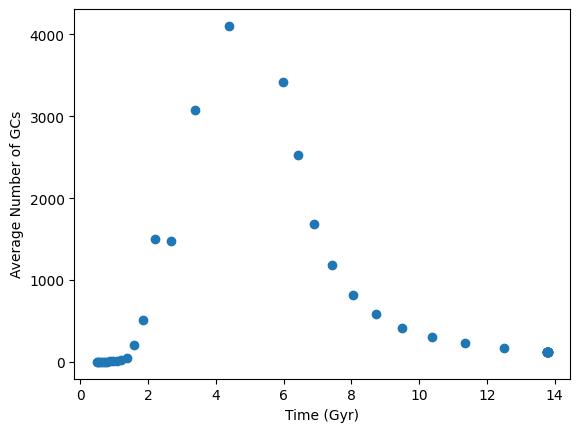

In [102]:
average_dict = {}

for snap in snap_pub:
    snap_id = snapshot_name(snap)
    average_dict[snap_id] = []
    for it in range(0, 101):
        it_id = iteration_name(it)
        group_ids = np.array(proc_data[it_id]["snapshots"][snap_id]["group_id"])
        mask = np.where(group_ids == 0)[0]
        average_dict[snap_id].append(len(mask))

average_num = []
for snap_id in average_dict.keys():
    avg = np.average(average_dict[snap_id])
    average_num.append(avg)

# plt.scatter(snap_pub, average_num)
plt.scatter(tim_pub, average_num)
plt.xlabel("Time (Gyr)")
plt.ylabel("Average Number of GCs")

In [103]:
kappa_snaps = data_dir + "external/kappa_co.json"
with open(kappa_snaps) as json_file:
    kappa_data = json.load(json_file)

In [104]:
kappa_lst = []
snap_lst = []
for snap_id in kappa_data.keys():
    kappa_lst.append(kappa_data[snap_id]["kappa_co"])
    snap_lst.append(int(snap_id[4:]))

tim_lst = []
for snap_id in kappa_data.keys():
    snap = int(snap_id[4:])
    idx = np.where(snap_pub == snap)[0][0]
    tim_lst.append(tim_pub[idx])

Text(0, 0.5, 'Kappa_co')

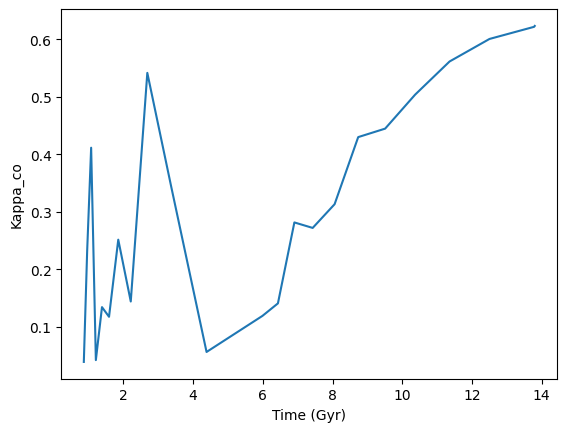

In [105]:
# plt.plot(snap_lst, kappa_lst)
plt.plot(tim_lst, kappa_lst)
plt.xlabel("Time (Gyr)")
plt.ylabel("Kappa_co")

In [106]:
# halt.prop("progenitor.indices", 0)
halt = halo.io.IO.read_tree(fire_dir)


# in utilities.simulation.Snapshot():
* reading:  Users/z5114326/Documents/simulations/m12i/m12i_res7100/snapshot_times.txt

* read 17859038 halos from:  Users/z5114326/Documents/simulations/m12i/m12i_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5



In [107]:
all_snapshot_fil = "/Users/z5114326/Documents/simulations/m12i/m12i_res7100/snapshot_times.txt"
with open(all_snapshot_fil) as f:
    content = f.readlines()
    content = content[5:]
snap_all = ascii.read(content)["i"]
tim_all = ascii.read(content)["time[Gyr]"]
lbt_all = ascii.read(content)["lookback-time[Gyr]"]

In [108]:
main_halo_tid = 25236877
tid_main_lst = main_prog_halt(halt, main_halo_tid)

num_prog_lst = []
tim_lst = []
for tid in tid_main_lst:
    idx = np.where(halt["tid"] == tid)[0][0]
    snap = halt["snapshot"][idx]

    num_prog = halt["progenitor.number"][idx]
    num_prog_lst.append(num_prog - 1)

    tim_idx = np.where(snap_all == snap)[0][0]
    tim = tim_all[tim_idx]
    tim_lst.append(tim)

In [109]:
prog_indices_lst = []
mass_prog = []
mass_main = []
for tid in tid_main_lst:
    idx = np.where(halt["tid"] == tid)[0][0]
    prog_idxs = halt.prop("progenitor.indices", idx)

    mass_lst = []
    for prog_idx in prog_idxs:
        if (halt["am.progenitor.main"][prog_idx] != 1) & (halt["am.phantom"][prog_idx] == 0):
            mass = halt["mass"][prog_idx]
            mass_lst.append(mass)

        else:
            mass = halt["mass"][prog_idx]
            mass_main.append(mass)

    mass_prog.append(np.sum(mass_lst))

mass_ratio = np.array(mass_prog) / np.array(mass_main)

/var/folders/nb/byfjq48d6jz8b3g74s3zr7rh0000gp/T/ipykernel_61549/3620874578.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(tim_lst, num_prog_lst, c=np.log10(mass_ratio))


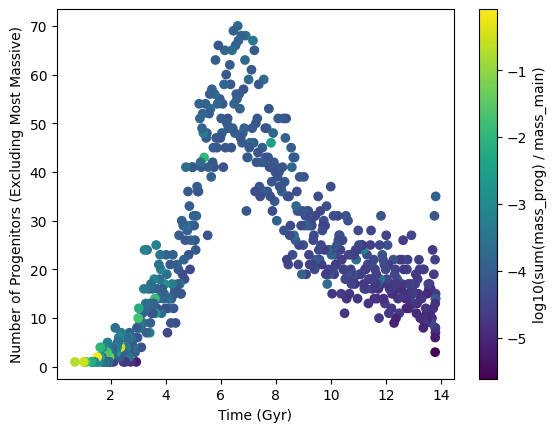

In [110]:
# plt.scatter(tim_lst, num_prog_lst, c=np.log10(mass_prog))
plt.scatter(tim_lst, num_prog_lst, c=np.log10(mass_ratio))
plt.xlabel("Time (Gyr)")
plt.ylabel("Number of Progenitors (Excluding Most Massive)")
plt.colorbar(label="log10(sum(mass_prog) / mass_main)")

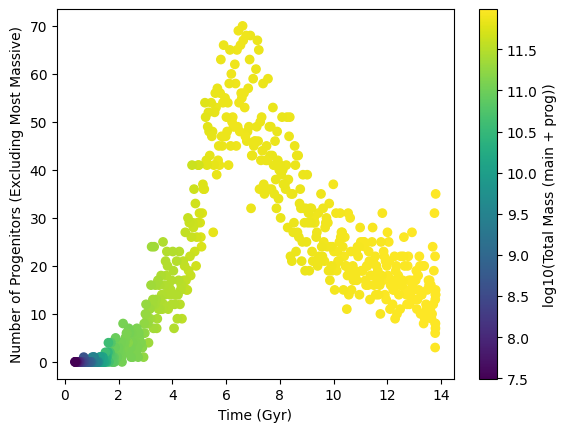

In [111]:
# plt.scatter(tim_lst, num_prog_lst, c=np.log10(mass_prog))
plt.scatter(tim_lst, num_prog_lst, c=np.log10(np.array(mass_prog) + mass_main))
plt.xlabel("Time (Gyr)")
plt.ylabel("Number of Progenitors (Excluding Most Massive)")
plt.colorbar(label="log10(Total Mass (main + prog))")

In [118]:
proc_data["it000"]["source"].keys()

<KeysViewHDF5 ['accretion_flag', 'analyse_flag', 'feh', 'form_lbt', 'form_time', 'gc_id', 'group_id', 'halo_acc_cid', 'halo_acc_tid', 'halo_pre_acc_cid', 'halo_pre_acc_tid', 'halo_z0', 'halo_zform', 'is_mpb', 'last_snap', 'logm_tform', 'logm_z0', 'ptype', 'pubsnap_zform', 'quality', 'real_flag', 'snap_acc', 'snap_pre_acc', 'snap_zform', 'survive_flag', 'survived_accretion', 't_acc', 't_dis', 'zform']>

In [135]:
proc_data["it000"]["snapshots"].keys()

<KeysViewHDF5 ['snap020', 'snap023', 'snap026', 'snap029', 'snap033', 'snap037', 'snap041', 'snap046', 'snap052', 'snap059', 'snap067', 'snap077', 'snap088', 'snap102', 'snap120', 'snap142', 'snap172', 'snap214', 'snap277', 'snap294', 'snap312', 'snap332', 'snap356', 'snap382', 'snap412', 'snap446', 'snap486', 'snap534', 'snap590', 'snap591', 'snap592', 'snap593', 'snap594', 'snap595', 'snap596', 'snap597', 'snap598', 'snap599', 'snap600']>

In [134]:
group_mask = np.array(proc_data["it000"]["source"]["group_id"]) == 0
anal_mask = np.array(proc_data["it000"]["source"]["analyse_flag"]) == 1

gc_id = proc_data["it000"]["source"]["gc_id"][group_mask & anal_mask]
last_snap = proc_data["it000"]["source"]["last_snap"][group_mask & anal_mask]

last_snap

array([ 70,  81, 120, ..., 292, 324, 303])

In [ ]:
# proc_data.close()